Hawk count: 110, Dove count: 890
Hawk vs Hawk: -25.0
Hawk vs Dove: 50
Dove vs Dove: 20.0
Dove vs Hawk: -10


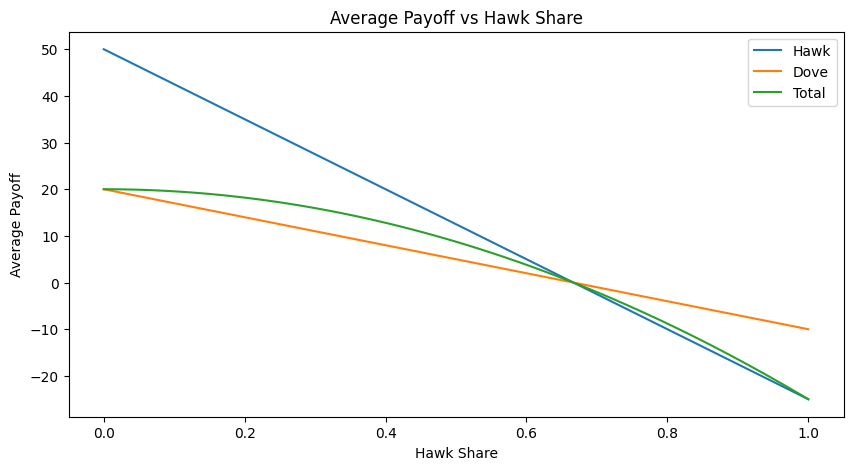

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameters
hawk_share = 0.1
dove_share = 1 - hawk_share

hawk_payoff = 50
dove_payoff = 50
hawk_cost = -100
dove_cost = -10


# # Initialize the population
# population = np.random.choice([0, 1], size=1000, p=[dove_share, hawk_share])

# hawk_count = np.count_nonzero(population == 1)
# dove_count = np.count_nonzero(population == 0)

# print(f"Hawk count: {hawk_count}, Dove count: {dove_count}")


# Calculate the payoff for each strategy
hawk_hawk_winrate = 0.5
dove_hawk_winrate = 0
hawk_dove_winrate = 1
dove_dove_winrate = 0.5

avg_hawk_hawk_payoff = hawk_payoff * hawk_hawk_winrate + hawk_cost * hawk_hawk_winrate
avg_hawk_dove_payoff = hawk_payoff * hawk_dove_winrate + hawk_cost * (1 - hawk_dove_winrate)

avg_dove_dove_payoff = dove_payoff * dove_dove_winrate + dove_cost * dove_dove_winrate
avg_dove_hawk_payoff = dove_payoff * dove_hawk_winrate + dove_cost * (1 - dove_hawk_winrate)


print(f"Hawk vs Hawk: {avg_hawk_hawk_payoff}")
print(f"Hawk vs Dove: {avg_hawk_dove_payoff}")

print(f"Dove vs Dove: {avg_dove_dove_payoff}")
print(f"Dove vs Hawk: {avg_dove_hawk_payoff}")


# Calculate the average payoff for each strategy as a function of the hawk share
hawk_shares = np.linspace(0, 1, 100)

avg_hawk_payoff = []
avg_dove_payoff = []
total_payoff = []

for x in hawk_shares:
    avg_hawk_payoff.append(avg_hawk_hawk_payoff * x + avg_hawk_dove_payoff * (1 - x))
    avg_dove_payoff.append(avg_dove_dove_payoff * (1 - x) + avg_dove_hawk_payoff * x)
    total_payoff.append(avg_hawk_payoff[-1] * x + avg_dove_payoff[-1] * (1 - x))

payoff_diff = np.array(avg_hawk_payoff) - np.array(avg_dove_payoff)


# Plot the average payoff for each strategy as a function of the hawk share
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=hawk_shares, y=avg_hawk_payoff, ax=ax, label="Hawk")
sns.lineplot(x=hawk_shares, y=avg_dove_payoff, ax=ax, label="Dove")
sns.lineplot(x=hawk_shares, y=total_payoff, ax=ax, label="Total")

ax.set_xlabel('Hawk Share')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff vs Hawk Share')
plt.show()